In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv("data_for_student_case.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290382 entries, 0 to 290381
Data columns (total 17 columns):
txid                            290382 non-null int64
bookingdate                     290382 non-null object
issuercountrycode               289889 non-null object
txvariantcode                   290382 non-null object
bin                             290242 non-null float64
amount                          290382 non-null float64
currencycode                    290382 non-null object
shoppercountrycode              289900 non-null object
shopperinteraction              290382 non-null object
simple_journal                  290382 non-null object
cardverificationcodesupplied    275665 non-null object
cvcresponsecode                 290382 non-null int64
creationdate                    290382 non-null object
accountcode                     290382 non-null object
mail_id                         290382 non-null object
ip_id                           290382 non-null object
card_id  

In [5]:
date_format = '%Y-%m-%d %H:%M:%S'
df['upd_bookingdate'] = pd.to_datetime(df['bookingdate'], format = date_format)

In [6]:
df['upd_bookingdate'].dt.month

0         11
1         11
2         11
3         11
4         11
5         11
6         11
7         11
8         12
9         11
10        11
11        11
12        12
13        11
14        11
15        11
16        11
17        11
18        12
19        11
20        11
21        12
22        11
23        11
24        11
25        11
26        11
27        11
28        11
29        11
          ..
290352    11
290353    11
290354    10
290355    11
290356    11
290357    11
290358    11
290359    11
290360    11
290361    11
290362    11
290363    11
290364    11
290365    11
290366    11
290367    11
290368    11
290369    11
290370    11
290371    11
290372    11
290373    11
290374    11
290375    11
290376    11
290377    11
290378    11
290379    11
290380    11
290381    11
dtype: int64

In [7]:
monthly_grp = df['amount'].groupby(df['upd_bookingdate'].dt.month).mean()
monthly_grp

1     158086.125000
2      24950.000000
3     181272.500000
7      27424.575040
8      27136.385957
9      27872.429348
10     35431.103721
11     15734.445339
12     77764.532710
Name: amount, dtype: float64

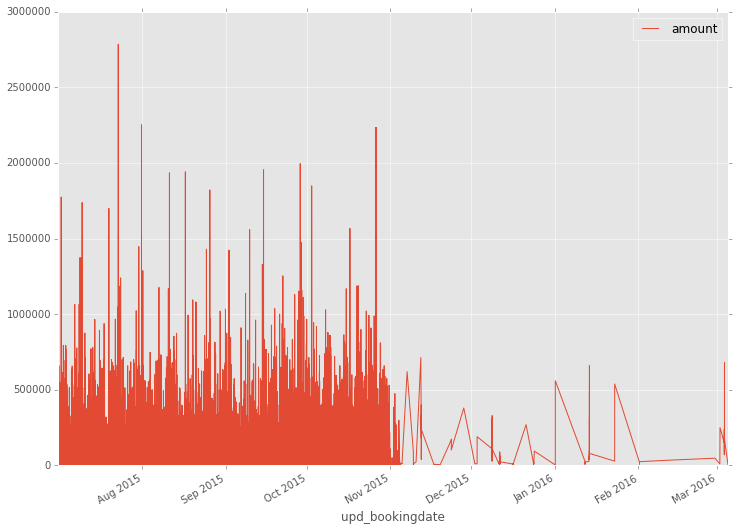

In [8]:
plt.figure();
df.plot(figsize=(12,9), x='upd_bookingdate', y='amount')

In [9]:
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9, 
            ...
            290372, 290373, 290374, 290375, 290376, 290377, 290378, 290379,
            290380, 290381],
           dtype='int64', length=290382)

### New try

In [10]:
fraud_d = pd.read_csv('data_for_student_case.csv', parse_dates='creationdate', index_col='creationdate')

In [11]:
fraud_d.head()

txid          bookingdate issuercountrycode  \
creationdate                                                       
2015-07-01 23:03:11     1  2015-11-09 14:26:51                MX   
2015-07-02 04:50:55     2  2015-11-09 14:27:38                MX   
2015-07-02 14:30:28     3  2015-11-23 16:34:16                MX   
2015-07-03 07:53:37     4  2015-11-23 16:34:51                MX   
2015-07-08 18:35:35     5  2015-11-09 14:26:08                MX   

                    txvariantcode     bin  amount currencycode  \
creationdate                                                     
2015-07-01 23:03:11      mccredit  530056   64800          MXN   
2015-07-02 04:50:55      mccredit  547046   44900          MXN   
2015-07-02 14:30:28      mccredit  528843  149900          MXN   
2015-07-03 07:53:37      mccredit  547146  109900          MXN   
2015-07-08 18:35:35   visaclassic  477291   89900          MXN   

                    shoppercountrycode shopperinteraction simple_journal  \
creationdate                                                               
2015-07-01 23:03:11                 MX          Ecommerce     Chargeback   
2015-07-02 04:50:55                 MX          Ecommerce     Chargeback   
2015-07-02 14:30:28                 MX          Ecommerce     Chargeback   
2015-07-03 07:53:37                 MX          Ecommerce     Chargeback   
2015-07-08 18:35:35                 MX          Ecommerce     Chargeback   

                    cardverificationcodesupplied  cvcresponsecode  \
creationdate                                                        
2015-07-01 23:03:11                         True                0   
2015-07-02 04:50:55                         True                0   
2015-07-02 14:30:28                         True                0   
2015-07-03 07:53:37                         True                0   
2015-07-08 18:35:35                         True                0   

                       accountcode      mail_id     ip_id     card_id  
creationdate                                                           
2015-07-01 23:03:11  MexicoAccount   email68370  ip111778  card184798  
2015-07-02 04:50:55  MexicoAccount  email101299   ip78749  card151595  
2015-07-02 14:30:28  MexicoAccount  email278604   ip70594  card242142  
2015-07-03 07:53:37  MexicoAccount   email47409  ip113648  card181744  
2015-07-08 18:35:35  MexicoAccount  email205501   ip83553   card97271

In [12]:
fraud_d.index

DatetimeIndex(['2015-07-01 23:03:11', '2015-07-02 04:50:55',
               '2015-07-02 14:30:28', '2015-07-03 07:53:37',
               '2015-07-08 18:35:35', '2015-07-08 23:04:26',
               '2015-07-09 02:31:36', '2015-07-09 04:56:48',
               '2015-07-09 22:55:40', '2015-07-11 09:44:14', 
               ...
               '2015-10-31 22:43:46', '2015-10-31 22:44:05',
               '2015-10-31 23:01:05', '2015-10-31 23:11:00',
               '2015-10-31 23:20:35', '2015-10-31 23:21:58',
               '2015-10-31 23:31:24', '2015-10-31 23:41:40',
               '2015-10-31 23:50:07', '2015-10-31 23:55:02'],
              dtype='datetime64[ns]', name=u'creationdate', length=290382, freq=None, tz=None)

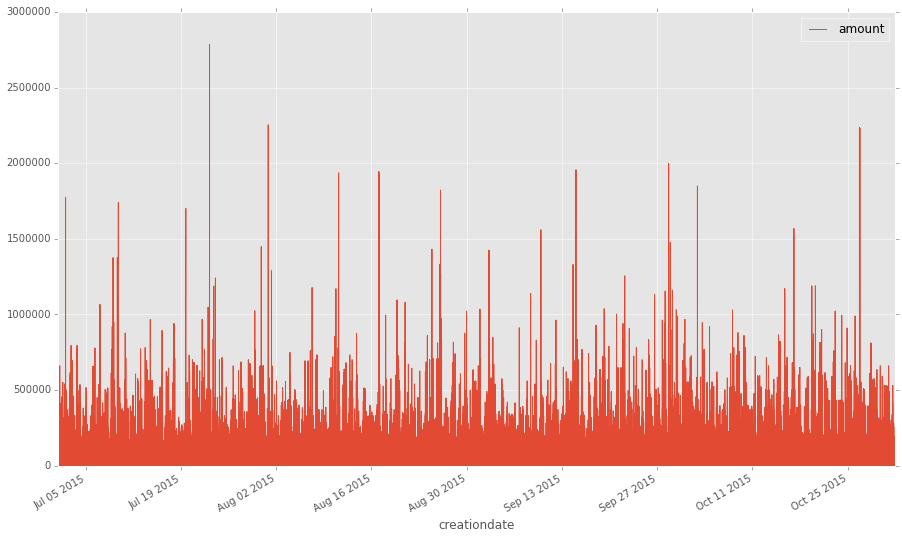

In [13]:
fraud_d.plot(figsize=(15,9), y = 'amount')

## Trying to visualize monthly trends

In [14]:
df1 = fraud_d.groupby(pd.TimeGrouper('M'))

In [15]:
df1.mean()

txid            bin        amount  cvcresponsecode
creationdate                                                             
2015-07-31    227261.794277  485538.178901  27199.325487         0.772844
2015-08-31    265084.500828  484764.831735  26388.639065         0.773569
2015-09-30    295666.004680  485263.053789  28821.026584         0.755236
2015-10-31    332811.465965  485450.770031  35008.023498         0.773427

In [16]:
monthly_group = fraud_d['amount'].groupby(fraud_d.index.month)

In [17]:
monthly_group.std()

7     64969.020022
8     64032.697801
9     67320.630806
10    75833.002690
Name: amount, dtype: float64

7     Axes(0.125,0.2;0.775x0.7)
8     Axes(0.125,0.2;0.775x0.7)
9     Axes(0.125,0.2;0.775x0.7)
10    Axes(0.125,0.2;0.775x0.7)
dtype: object

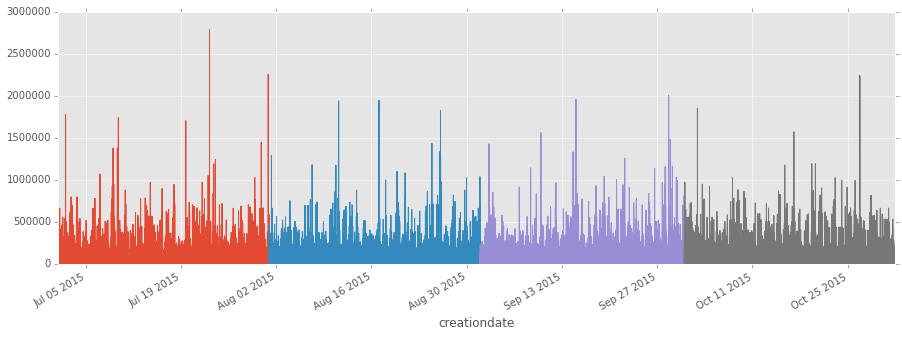

In [18]:
monthly_group.plot(figsize=(15,5))

In [29]:
fm = fraud_d.resample('M')

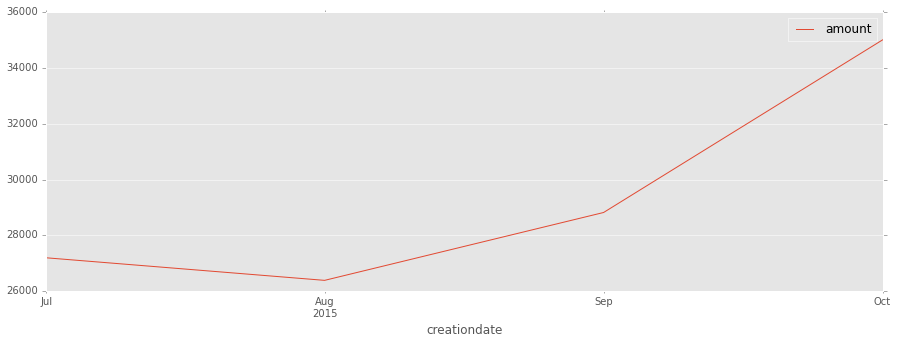

In [32]:
fm.plot(figsize=(15,5), y = 'amount')

### Checking for daily trends

In [46]:
fm = fraud_d.resample('D')

In [47]:
fm

txid            bin        amount  cvcresponsecode
creationdate                                                             
2015-07-01    214285.641243  483935.400141  25345.299082         0.813912
2015-07-02    212002.874007  484040.967124  27891.328520         0.805415
2015-07-03    202316.110149  483584.692689  28820.941832         0.746700
2015-07-04    217802.730586  484720.188286  23340.569631         0.826030
2015-07-05    222010.311573  484653.926757  18606.566436         0.852291
2015-07-06    219422.476792  485592.450558  25512.787226         0.777943
2015-07-07    218141.853365  484063.421875  28045.231170         0.766426
2015-07-08    216523.887949  485273.417336  27907.936152         0.757294
2015-07-09    216854.697170  486061.848442  39170.376415         0.722170
2015-07-10    225256.939324  487549.237401  27718.923740         0.769562
2015-07-11    233198.379363  485187.771210  19440.884874         0.847520
2015-07-12    239366.571392  485784.304549  16574.850539         0.862609
2015-07-13    223088.745090  485891.797054  27667.100655         0.733633
2015-07-14    204700.734367  485453.478739  33102.614307         0.696348
2015-07-15    226062.982222  485640.083992  27226.914074         0.712593
2015-07-16    208568.182271  485249.194784  36134.954017         0.693075
2015-07-17    220329.024698  485548.092257  32090.220088         0.713502
2015-07-18    222122.507947  488004.604577  23770.806103         0.729180
2015-07-19    209048.083567  487289.108929  29429.239029         0.699813
2015-07-20    227383.605062  485538.121357  28827.276027         0.743075
2015-07-21    227156.370042  486734.222048  26922.655532         0.737474
2015-07-22    221348.450214  484152.122056  30145.979122         0.715203
2015-07-23    221690.429719  485543.923563  35144.943775         0.701090
2015-07-24    243639.162715  485608.423362  23299.401897         0.815945
2015-07-25    257182.862490  485805.597556  22910.230269         0.838487
2015-07-26    256400.657994  487584.608904  22266.398836         0.848340
2015-07-27    248494.960954  486392.613715  34042.809978         0.765293
2015-07-28    239670.347088  484734.421753  29411.179734         0.749656
2015-07-29    239300.937965  487258.715492  36548.855087         0.720596
2015-07-30    243773.391512  484601.404773  31519.568431         0.756319
...                     ...            ...           ...              ...
2015-10-02    299745.728806  485159.555506  32237.198402         0.707945
2015-10-03    312894.146611  485224.920610  28317.454020         0.764582
2015-10-04    331324.912434  484529.791502  22547.126532         0.822680
2015-10-05    309102.359087  485032.483187  28264.761809         0.744996
2015-10-06    310743.439035  485463.206789  28662.484145         0.729343
2015-10-07    317665.541237  485712.149055  34226.224227         0.736684
2015-10-08    391847.867157  484337.754368  33592.227917         0.940244
2015-10-09    361368.645473  483013.992334  29171.456997         0.856940
2015-10-10    317081.021040  483846.135593  33834.905903         0.747516
2015-10-11    331266.746341  486632.259766  33153.055610         0.793171
2015-10-12    307986.461974  486460.776359  36168.646197         0.702409
2015-10-13    301444.174220  484651.118832  37947.528701         0.697885
2015-10-14    303058.176563  489129.807292  39069.124479         0.696354
2015-10-15    282999.068465  487406.630265  56269.516598         0.616701
2015-10-16    271804.474453  487557.156180  62889.695115         0.595171
2015-10-17    313484.119801  486368.276398  39750.826195         0.698945
2015-10-18    325647.964606  488033.106181  33096.592182         0.752245
2015-10-19    315696.721228  486619.171531  39350.616880         0.712532
2015-10-20    303503.112721  486863.655209  51262.535158         0.688674
2015-10-21    303227.406195  487251.862493  41355.611923         0.669784
2015-10-22    276135.228790  487460.956189  60960.718359         0.618220
2015-10-23    307612.586406

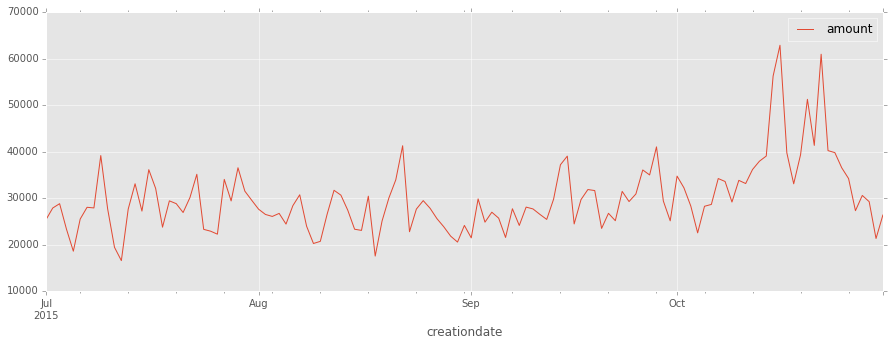

In [48]:
plt.figure();
fm.plot(figsize=(15,5), y = 'amount')

### Grouping on status message for trends

In [51]:
fraud_d.groupby(fraud_d['simple_journal']).count()

txid  bookingdate  issuercountrycode  txvariantcode     bin  \
simple_journal                                                                  
Chargeback         345          345                345            345     345   
Refused          53346        53346              52857          53346   53206   
Settled         236691       236691             236687         236691  236691   

                amount  currencycode  shoppercountrycode  shopperinteraction  \
simple_journal                                                                 
Chargeback         345           345                 345                 345   
Refused          53346         53346               53206               53346   
Settled         236691        236691              236349              236691   

                cardverificationcodesupplied  cvcresponsecode  accountcode  \
simple_journal                                                               
Chargeback                               345              345          345   
Refused                                51823            53346        53346   
Settled                               223497           236691       236691   

                mail_id   ip_id  card_id  
simple_journal                            
Chargeback          345     345      345  
Refused           53346   53346    53346  
Settled          236691  236691   236691

In [52]:
chargeback_grp = fraud_d['amount'].groupby(fraud_d['simple_journal'])

In [59]:
chargeback_grp.mean()

simple_journal
Chargeback    105137.652174
Refused        75353.882597
Settled        18888.996037
Name: amount, dtype: float64

simple_journal
Chargeback    Axes(0.125,0.2;0.775x0.7)
Refused       Axes(0.125,0.2;0.775x0.7)
Settled       Axes(0.125,0.2;0.775x0.7)
dtype: object

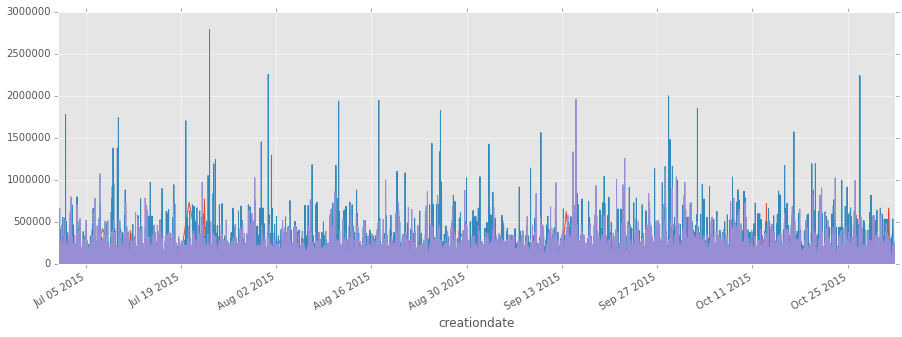

In [62]:
plt.figure();

chargeback_grp.plot(figsize=(15,5))

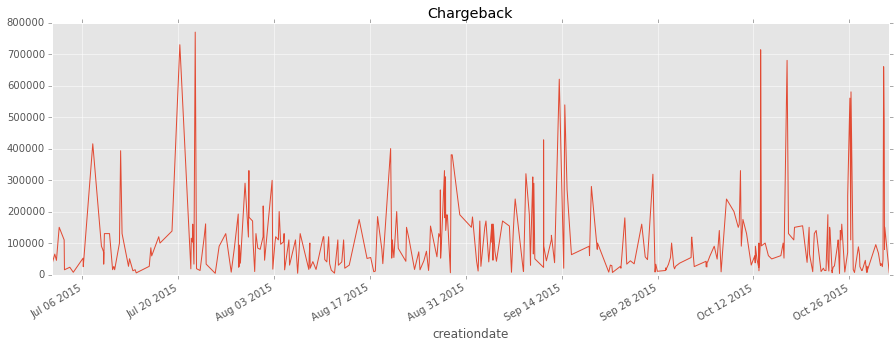

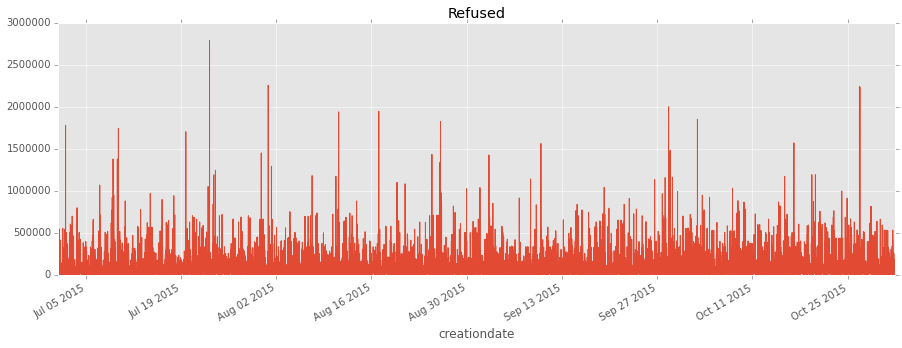

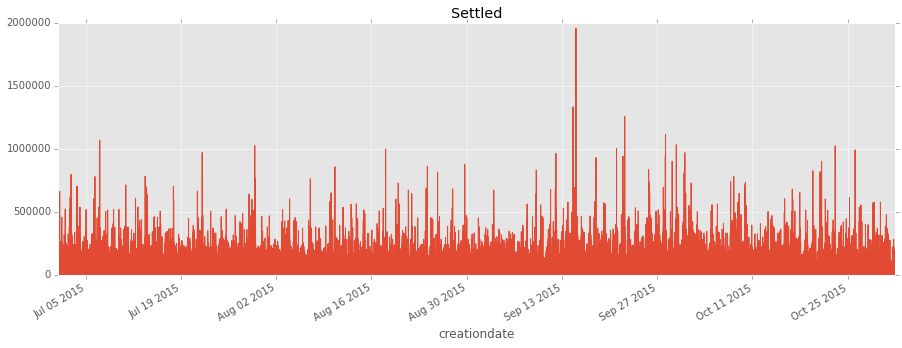

In [64]:
for name, group in chargeback_grp:
    plt.figure()
    group.plot(figsize=(15,5),title=(str(name)))

In [69]:
chargeback_grp.max()

simple_journal
Chargeback     769500
Refused       2785840
Settled       1955765
Name: amount, dtype: float64

In [75]:
chargeback_grp_mails = fraud_d['amount'].groupby([fraud_d['simple_journal'], fraud_d['mail_id']])


In [84]:
chargeback_grp_mails.size()

simple_journal  mail_id    
Chargeback      email100813      1
                email101299      1
                email10250       1
                email102930      2
                email103112      1
                email103619      1
                email103772      1
                email105036      1
                email105510      1
                email105581      1
                email105900      1
                email108296      2
                email108304      1
                email110639      1
                email110710      2
                email110896      1
                email110975      1
                email111032      1
                email111048      1
                email112275      1
                email115383      1
                email115605      1
                email115857      1
                email116623      1
                email118183      1
                email118325      1
                email119565      1
                email120246